# Challenge Tennis

# Introduction

Avant de se lancer dans l'informatique, observons les données et décrivons les données du mieux possible. Ainsi, on pourra vérifier la vraisemblance des données, vérifier les valeurs manquantes ou abbérantes et comprendre les données. 

De plus, il faut au préalable expliciter le problème de data science posé afin de choisir les données adéquates aux problème.

## Describing the problem

Ici, nous devons faire la prédiction de match professionnel de tennis. Il s'agit donc d'un problème d'apprentissage supervisé. Le vecteur X (les échantillons) contiendra les features d'un match entre deux joueur d'identifiant ID1 et ID2. Nous verrons par la suite la création de ce vecteur X. Le vecteur Y contiendra les labels associés aux échantillons (match).

Les labels seront tels que Y=1 si le joueur 1 remporte le match et Y=0 si le joueur 2 gagne le match. Nous pouvons ainsi définir notre problème d'apprentissage de deux façons différentes: classification ou regression.

## Describing the data

In [1]:
# Import libraries for data processing and viewing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data
court = pd.read_csv('courts.csv')
facts_atp = pd.read_csv('facts_atp.csv')
games_atp = pd.read_csv('games_atp.csv',parse_dates=['DATE_G'])
games_atp_public = pd.read_csv('games_atp_public.csv',parse_dates=['DATE_G'])
players_atp = pd.read_csv('players_atp.csv')
ratings_atp = pd.read_csv('ratings_atp.csv',parse_dates=['DATE_R'])
rounds = pd.read_csv('rounds.csv')
stat_atp = pd.read_csv('stat_atp.csv')
tours_atp = pd.read_csv('tours_atp.csv')

## court.csv 

In [3]:
court.head()

,ID_C,NAME_C
0,1,Hard
1,2,Clay
2,3,I.hard
3,4,Carpet
4,5,Grass


La table court.csv contient le mapping entre l'identifiant d'un type de terrain et son nom. Nous n'utiliserons pas cette table dans la suite du projet. 

## facts_atp.csv

In [4]:
facts_atp.head()

,ID_P_F,YEAR_F,TMW_F,TML_F,TBW_F,TBL_F,MF_F,ACES_F,DF_F,SRV1_F,WON1_F,WON2_F,SGW_F,BPS_F,PWR1S_F,PWR2S_F,BPW_F,RGW_F,PRIZE_F
0,5992,2012,75,12,17,12,87,512,147,64,75,56,87,66,35,56,46,35,12803737
1,19,2012,71,12,21,15,80,665,120,63,78,60,91,69,31,51,42,26,8584842
2,1075,2012,56,16,18,9,72,521,163,60,74,54,84,67,32,56,41,31,5708230
3,677,2012,42,6,8,3,48,160,59,67,75,57,88,71,38,55,49,38,4997448
4,673,2012,76,15,20,13,85,279,178,63,73,57,85,65,34,54,44,31,4409340


In [5]:
facts_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
ID_P_F     948 non-null int64
YEAR_F     948 non-null int64
TMW_F      948 non-null int64
TML_F      948 non-null int64
TBW_F      948 non-null int64
TBL_F      948 non-null int64
MF_F       948 non-null int64
ACES_F     948 non-null int64
DF_F       948 non-null int64
SRV1_F     948 non-null int64
WON1_F     948 non-null int64
WON2_F     948 non-null int64
SGW_F      948 non-null int64
BPS_F      948 non-null int64
PWR1S_F    948 non-null int64
PWR2S_F    948 non-null int64
BPW_F      948 non-null int64
RGW_F      948 non-null int64
PRIZE_F    948 non-null int64
dtypes: int64(19)
memory usage: 140.8 KB


cette table ne contient que peu d'information sur les joueurs et les matchs... Nous ne l'utiliserons donc pas dans la suite du projet

## games_atp.csv

In [6]:
games_atp.head(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
0,17613,18854,8887,4,7-6(8) 3-6 10-7,2012-01-31
1,25192,25191,8888,4,6-3 6-2,2012-01-31


In [7]:
games_atp.tail(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
84483,11742,28075,13296,3,6-1 6-1,2016-07-31
84484,22428,13070,13296,3,3-6 6-0 6-3,2016-07-31


In [8]:
games_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 6 columns):
ID1_G       84485 non-null int64
ID2_G       84485 non-null int64
ID_T_G      84485 non-null int64
ID_R_G      84485 non-null int64
RESULT_G    84485 non-null object
DATE_G      84485 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.9+ MB


games_atp.csv sera notre ensemble d'apprentissage (84 485 matchs de 2012 à 2016). cet ensemble permettra de déterminer les paramètres de notre modèle.

## games_atp_public.csv

In [9]:
games_atp_public.head(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,DATE_G
0,30589,54796,13296,4,2016-08-01
1,54409,24429,13296,4,2016-08-01


In [10]:
games_atp_public.tail(2)

,ID1_G,ID2_G,ID_T_G,ID_R_G,DATE_G
7606,3577,673,12842,4,2016-10-03
7607,6101,12043,12843,4,2016-10-03


In [11]:
games_atp_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 5 columns):
ID1_G     7608 non-null int64
ID2_G     7608 non-null int64
ID_T_G    7608 non-null int64
ID_R_G    7608 non-null int64
DATE_G    7608 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 297.3 KB


Cette ensemble sera notre ensemble test (7608 match fin 2016)

## tours_atp.csv

In [12]:
tours_atp.head(2)

,ID_T,NAME_T,ID_C_T,DATE_T,RANK_T,LINK_T,COUNTRY_T,PRIZE_T,RATING_T,URL_T,...,SITE_T,RACE_T,ENTRY_T,SINGLES_T,DOUBLES_T,TIER_T,RESERVE_INT_T,RESERVE_CHAR_T,LIVE_T,RESULT_T
0,1,Australian Men's Hardcourt Championships - Ade...,1,1997-01-01 00:00:00,2,1600.0,AUS,$303K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Qatar Mobil Open - Doha,1,1997-01-01 00:00:00,2,1601.0,QAT,$600K,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
tours_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13243 entries, 0 to 13242
Data columns (total 22 columns):
ID_T              13243 non-null int64
NAME_T            13243 non-null object
ID_C_T            13243 non-null int64
DATE_T            13243 non-null object
RANK_T            13243 non-null int64
LINK_T            4678 non-null float64
COUNTRY_T         13243 non-null object
PRIZE_T           11810 non-null object
RATING_T          884 non-null float64
URL_T             2632 non-null object
LATITUDE_T        5557 non-null float64
LONGITUDE_T       5557 non-null float64
SITE_T            2188 non-null float64
RACE_T            1983 non-null float64
ENTRY_T           1985 non-null float64
SINGLES_T         769 non-null float64
DOUBLES_T         768 non-null float64
TIER_T            1422 non-null object
RESERVE_INT_T     0 non-null float64
RESERVE_CHAR_T    4815 non-null object
LIVE_T            0 non-null float64
RESULT_T          179 non-null float64
dtypes: float64(12), int64(

tours_atp.csv contient les informations sur les tournois. Nous ne nous interesserons seulement aux variables expressives. C'est-à-dire : l'identifiant ,le nom, l'identité, la date et le rating du tournoi .

## Players_atp.csv

In [14]:
players_atp.head(2)

,ID_P,NAME_P,DATE_P,COUNTRY_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,...,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
0,1,Gustavo Kuerten,1976-09-10 00:00:00,BRA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Marat Safin,1980-01-27 00:00:00,RUS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
players_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55562 entries, 0 to 55561
Data columns (total 23 columns):
ID_P             55562 non-null int64
NAME_P           55562 non-null object
DATE_P           26722 non-null object
COUNTRY_P        27342 non-null object
RANK_P           900 non-null float64
PROGRESS_P       900 non-null float64
POINT_P          900 non-null float64
HARDPOINT_P      900 non-null float64
HARDTOUR_P       900 non-null float64
CLAYPOINT_P      900 non-null float64
CLAYTOUR_P       900 non-null float64
GRASSPOINT_P     900 non-null float64
GRASSTOUR_P      900 non-null float64
CARPETPOINT_P    900 non-null float64
CARPETTOUR_P     900 non-null float64
PRIZE_P          1733 non-null float64
CH_P             100 non-null float64
DR_P             900 non-null float64
DP_P             900 non-null float64
DO_P             900 non-null float64
IHARDPOINT_P     900 non-null float64
IHARDTOUR_P      900 non-null float64
ITF_ID           15606 non-null float64
dtypes: flo

Players_atp est la mapping des identifiants et des nom de joueur. Cette table n'étant que partiellement pleine, ne sera pas utilisé dans la suite du challenge.

## Ratings_atp.csv

In [16]:
ratings_atp.head()

,DATE_R,ID_P_R,POINT_R,POS_R
0,2012-01-02,5992,13630,1
1,2012-01-02,677,9595,2
2,2012-01-02,19,8170,3
3,2012-01-02,1075,7380,4
4,2012-01-02,673,4925,5


In [17]:
ratings_atp.tail()

,DATE_R,ID_P_R,POINT_R,POS_R
173395,2016-07-25,35084,24,798
173396,2016-07-25,30626,24,799
173397,2016-07-25,17268,23,800
173398,2016-07-25,21460,23,801
173399,2016-07-25,17961,23,802


In [18]:
ratings_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173400 entries, 0 to 173399
Data columns (total 4 columns):
DATE_R     173400 non-null datetime64[ns]
ID_P_R     173400 non-null int64
POINT_R    173400 non-null int64
POS_R      173400 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 MB


In [19]:
ratings_atp.describe()

,ID_P_R,POINT_R,POS_R
count,173400.000000,173400.000000,173400.000000
mean,11812.909769,291.548449,428.008651
std,7956.892203,810.569058,257.380509
min,7.000000,12.000000,1.000000
25%,5961.000000,39.000000,207.000000
50%,10995.000000,97.000000,413.000000
75%,17829.000000,238.000000,647.000000
max,42971.000000,16950.000000,900.000000


la table ratings contient le classement complet ATP (Rank, ATP point) des joueurs toutes les deux semaines (vu le nombre d'échantillons et le nombre présent maximum (900) dans le classement). On ne retrouve aucune valeur abbérante, ni de valeur manquante.

## Stat_atp.csv

In [20]:
stat_atp.head()

,ID1,ID2,ID_T,ID_R,FS_1,FSOF_1,ACES_1,DF_1,UE_1,W1S_1,...,NAOF_2,TPW_2,FAST_2,A1S_2,A2S_2,RPW_1,RPWOF_1,RPW_2,RPWOF_2,MT
0,401,921,2205,1,52.0,91.0,1.0,2.0,25.0,37.0,...,32.0,83.0,NaN,NaN,NaN,31.0,78.0,36.0,91.0,NaN
1,65,706,2205,1,37.0,71.0,3.0,6.0,28.0,27.0,...,10.0,62.0,NaN,NaN,NaN,31.0,67.0,26.0,71.0,NaN
2,77,406,2205,1,32.0,50.0,4.0,0.0,7.0,26.0,...,26.0,46.0,NaN,NaN,NaN,23.0,58.0,11.0,50.0,NaN
3,840,666,2205,2,50.0,75.0,4.0,2.0,31.0,29.0,...,29.0,80.0,NaN,NaN,NaN,38.0,86.0,32.0,75.0,NaN
4,831,880,2205,2,49.0,79.0,11.0,5.0,43.0,37.0,...,11.0,73.0,NaN,NaN,NaN,34.0,81.0,26.0,79.0,NaN


In [21]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124273 entries, 0 to 124272
Data columns (total 45 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124269 non-null float64
FSOF_1     124268 non-null float64
ACES_1     122636 non-null float64
DF_1       123790 non-null float64
UE_1       11621 non-null float64
W1S_1      124272 non-null float64
W1SOF_1    124272 non-null float64
W2S_1      124269 non-null float64
W2SOF_1    124269 non-null float64
WIS_1      11376 non-null float64
BP_1       124240 non-null float64
BPOF_1     124240 non-null float64
NA_1       8079 non-null float64
NAOF_1     8079 non-null float64
TPW_1      123937 non-null float64
FAST_1     4449 non-null float64
A1S_1      4370 non-null float64
A2S_1      4362 non-null float64
FS_2       124269 non-null float64
FSOF_2     124268 non-null float64
ACES_2     122627 non-null float64
DF_2       123808 non-null float64

Cette table contient les informations détaillé d'un grand nombre de match (124273). Ne pouvant prendre les données d'un match pour sa prédiction, nous utiliserons cette table afin d'utiliser les matchs antécédents des deux joueurs. Ainsi cette base sera utilisé pour calculer les features d'un match.

Il y a beaucoup de valeur manquante/abbérante qu'il faudra traiter au cas par cas.

# Preprocessing Data

Nous devons créer notre training set avec des proportions égales. Il s'agit d'une classification bi-classe donc il faut qu'il y a environ autant de match gagné par le joueur 1 que par le joueur 2. Il faut donc transformer notre training set.

In [22]:
def unbiased_games_atp(games_atp):
    #preparing biased data
    #create predict variable
    games_atp['result']= games_atp['RESULT_G'].map(lambda x:1)

    #swap id1 & id2 and predic variable is 1
    games_atp['result'].iloc[::2] = games_atp['RESULT_G'].iloc[::2].map(lambda x:0)
    idx = (games_atp['result']==0)
    games_atp.loc[idx,['ID1_G','ID2_G']] = games_atp.loc[idx,['ID2_G','ID1_G']].values
    return games_atp

#checking if result (compare with other notebook) GOOD
games_atp_unbiased = unbiased_games_atp(games_atp)
train = games_atp_unbiased
test = games_atp_public

/home/gozuslayer/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Cleaning data

Procedons maintenant au nettoyage de stat_atp

In [23]:
stat_atp.describe()

/home/gozuslayer/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID1,ID2,ID_T,ID_R,FS_1,FSOF_1,ACES_1,DF_1,UE_1,W1S_1,...,NA_2,NAOF_2,TPW_2,FAST_2,A1S_2,A2S_2,RPW_1,RPWOF_1,RPW_2,RPWOF_2
count,124273.000000,124273.000000,124273.000000,124273.000000,124269.000000,124268.000000,122636.000000,123790.000000,11621.000000,124272.000000,...,8079.000000,8078.000000,123937.000000,4449.000000,4370.000000,4362.000000,123718.000000,123718.000000,123718.000000,123718.000000
mean,11838.072695,13498.939094,10051.389884,4.788377,43.078419,69.199730,4.995531,2.548671,22.541262,31.992613,...,16.316252,27.534167,63.368833,201.753203,180.338215,147.946813,31.286426,71.914055,22.772078,69.154990
std,11631.132455,12580.644475,2883.371240,2.860029,16.264655,24.842891,4.433386,2.161332,17.795331,11.323782,...,11.603016,19.537553,26.095818,22.875558,16.505270,14.700695,9.673268,24.605637,11.170876,24.841434
min,1.000000,1.000000,1111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.000000,2379.000000,8089.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8662.000000,10066.000000,10819.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18398.000000,21973.000000,12698.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,56645.000000,56647.000000,13590.000000,17.000000,183.000000,243.000000,112.000000,24.000000,128.000000,144.000000,...,125.000000,224.000000,502.000000,242.000000,212.000000,191.000000,110.000000,253.000000,255.000000,243.000000


/home/gozuslayer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/home/gozuslayer/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


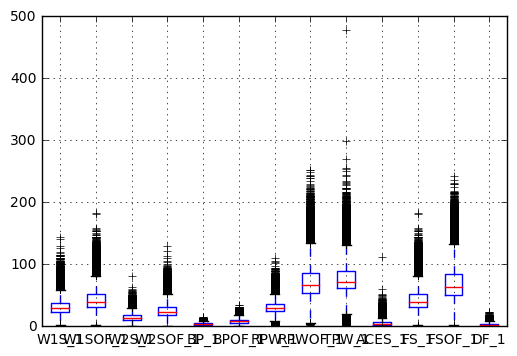

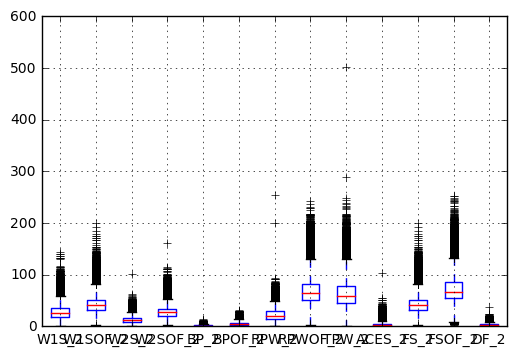

In [31]:
columns = ['W1S_','W1SOF_','W2S_','W2SOF_','BP_','BPOF_','RPW_','RPWOF_','TPW_','ACES_','FS_','FSOF_','DF_']
columns_player_ID1 = [s + '1' for s in columns]
columns_player_ID2 = [s + '2' for s in columns]
plt.figure(1)
stat_atp[columns_player_ID1].boxplot()
plt.figure(2)
stat_atp[columns_player_ID2].boxplot()
plt.show()

Les données sont cohérentes car le joueur 2 perd le match : il doit donc avoir en moyenne des stats inférieur au joueur 1

FS_* et FSOF_* correspond à la réussite de premier service. Il n'y a priori aucune valeur abbérante. Pour le traitement des valeur manquantes, on peut décider de les remplir avec la moyenne.

In [32]:
stat_atp.FS_1 = stat_atp.FS_1.fillna(stat_atp.FS_1.mean())
stat_atp.FS_2 = stat_atp.FS_2.fillna(stat_atp.FS_2.mean())

In [33]:
stat_atp.FSOF_1 = stat_atp.FSOF_1.fillna(stat_atp.FSOF_1.mean())
stat_atp.FSOF_2 = stat_atp.FSOF_2.fillna(stat_atp.FSOF_2.mean())

ACES_* correspond aux nombres d'aces fait pendant le match. De même, on remplit par la moyenne.

In [34]:
stat_atp.ACES_1 = stat_atp.ACES_1.fillna(stat_atp.ACES_1.mean())
stat_atp.ACES_2 = stat_atp.ACES_2.fillna(stat_atp.ACES_2.mean())

DF_* correspond aux doubles fautes commises dans le match. de même

In [35]:
stat_atp.DF_1 = stat_atp.DF_1.fillna(stat_atp.DF_1.mean())
stat_atp.DF_2 = stat_atp.DF_2.fillna(stat_atp.DF_2.mean())

De même pour le reste des variables...

In [36]:
stat_atp.W1S_1 = stat_atp.W1S_1.fillna(stat_atp.W1S_1.mean())
stat_atp.W1SOF_1 = stat_atp.W1SOF_1.fillna(stat_atp.W1SOF_1.mean())

In [37]:
stat_atp.W2SOF_1 = stat_atp.W2SOF_1.fillna(stat_atp.W2SOF_1.mean())
stat_atp.W2S_1= stat_atp.W2S_1.fillna(stat_atp.W2S_1.mean())

In [38]:
stat_atp.BP_1 = stat_atp.BP_1.fillna(stat_atp.BP_1.mean())
stat_atp.BP_2 = stat_atp.BP_2.fillna(stat_atp.BP_2.mean())

In [39]:
stat_atp.TPW_1= stat_atp.TPW_1.fillna(stat_atp.TPW_1.mean())
stat_atp.TPW_2= stat_atp.TPW_2.fillna(stat_atp.TPW_2.mean())

In [40]:
stat_atp.RPW_1= stat_atp.RPW_1.fillna(stat_atp.RPW_1.mean())
stat_atp.RPW_2= stat_atp.RPW_2.fillna(stat_atp.RPW_2.mean())

In [41]:
stat_atp.RPWOF_1= stat_atp.RPWOF_1.fillna(stat_atp.RPWOF_1.mean())
stat_atp.RPWOF_2= stat_atp.RPWOF_2.fillna(stat_atp.RPWOF_2.mean())

In [42]:
stat_atp.BPOF_1= stat_atp.BPOF_1.fillna(stat_atp.BPOF_1.mean())
stat_atp.BPOF_2= stat_atp.BPOF_2.fillna(stat_atp.BPOF_2.mean())

In [43]:
stat_atp.W2SOF_1 = stat_atp.W2SOF_1.fillna(stat_atp.W2SOF_1.mean())
stat_atp.W2SOF_2 = stat_atp.W2SOF_2.fillna(stat_atp.W2SOF_2.mean())

In [44]:
stat_atp.W1SOF_1 = stat_atp.W1SOF_1.fillna(stat_atp.W1SOF_1.mean())
stat_atp.W1SOF_2 = stat_atp.W1SOF_2.fillna(stat_atp.W1SOF_2.mean())

In [45]:
stat_atp.W2S_2= stat_atp.W2S_2.fillna(stat_atp.W2S_2.mean())

stat_atp.W2S_1 = stat_atp.W2S_1.fillna(stat_atp.W2S_1.mean())

In [46]:
stat_atp.W1S_2 = stat_atp.W1S_2.fillna(stat_atp.W1S_2.mean())
stat_atp.W1S_1 = stat_atp.W1S_1.fillna(stat_atp.W1S_1.mean())

On retire les variables où il manque trop d'information...

In [47]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124273 entries, 0 to 124272
Data columns (total 45 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124273 non-null float64
FSOF_1     124273 non-null float64
ACES_1     124273 non-null float64
DF_1       124273 non-null float64
UE_1       11621 non-null float64
W1S_1      124273 non-null float64
W1SOF_1    124273 non-null float64
W2S_1      124273 non-null float64
W2SOF_1    124273 non-null float64
WIS_1      11376 non-null float64
BP_1       124273 non-null float64
BPOF_1     124273 non-null float64
NA_1       8079 non-null float64
NAOF_1     8079 non-null float64
TPW_1      124273 non-null float64
FAST_1     4449 non-null float64
A1S_1      4370 non-null float64
A2S_1      4362 non-null float64
FS_2       124273 non-null float64
FSOF_2     124273 non-null float64
ACES_2     124273 non-null float64
DF_2       124273 non-null float64

In [48]:
columns_to_drop = ['UE_','NA_','NAOF_','WIS_','FAST_','A1S_','A2S_']
columns_player_ID1 = [s + '1' for s in columns_to_drop]
columns_player_ID2 = [s + '2' for s in columns_to_drop]
col = columns_player_ID2 + columns_player_ID1
stat_atp.drop(col, axis=1, inplace=True)

In [49]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124273 entries, 0 to 124272
Data columns (total 31 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124273 non-null float64
FSOF_1     124273 non-null float64
ACES_1     124273 non-null float64
DF_1       124273 non-null float64
W1S_1      124273 non-null float64
W1SOF_1    124273 non-null float64
W2S_1      124273 non-null float64
W2SOF_1    124273 non-null float64
BP_1       124273 non-null float64
BPOF_1     124273 non-null float64
TPW_1      124273 non-null float64
FS_2       124273 non-null float64
FSOF_2     124273 non-null float64
ACES_2     124273 non-null float64
DF_2       124273 non-null float64
W1S_2      124273 non-null float64
W1SOF_2    124273 non-null float64
W2S_2      124273 non-null float64
W2SOF_2    124273 non-null float64
BP_2       124273 non-null float64
BPOF_2     124273 non-null float64
TPW_2      124273 non-

On admet que lorsqu'un match n'a pas de date (MT : MatchTime) on lui attribue la date du tournoi (dans tours.csv). Cependant lorsque l'on regarde de plus près le MT ne doit pas être bon vu la date des matchs...

In [50]:
pd.to_datetime(stat_atp.MT).max()

Timestamp('1899-12-30 23:32:21')

In [51]:
stat_atp.MT.min()

inf

In [3]:
#mergin tables
columns_tours_to_keep = ['ID_T','DATE_T']
stat_atp = pd.merge(stat_atp,tours_atp[columns_tours_to_keep],on="ID_T",how="left")

#Remplissage de la date des matchs.
stat_atp.MT = stat_atp.DATE_T
stat_atp.drop('DATE_T', axis=1, inplace = "True")

In [4]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124273 entries, 0 to 124272
Data columns (total 45 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124269 non-null float64
FSOF_1     124268 non-null float64
ACES_1     122636 non-null float64
DF_1       123790 non-null float64
UE_1       11621 non-null float64
W1S_1      124272 non-null float64
W1SOF_1    124272 non-null float64
W2S_1      124269 non-null float64
W2SOF_1    124269 non-null float64
WIS_1      11376 non-null float64
BP_1       124240 non-null float64
BPOF_1     124240 non-null float64
NA_1       8079 non-null float64
NAOF_1     8079 non-null float64
TPW_1      123937 non-null float64
FAST_1     4449 non-null float64
A1S_1      4370 non-null float64
A2S_1      4362 non-null float64
FS_2       124269 non-null float64
FSOF_2     124268 non-null float64
ACES_2     122627 non-null float64
DF_2       123808 non-null float64

## Feature extraction 

Enrichissons notre table stats_atp avec la tours_atp en y ajoutant le type de surface et le rating du tournoi (grand chelem, masters, ...)

In [86]:
#mergin tables
columns_tours_to_keep = ['ID_T','ID_C_T','RANK_T']
stat_atp = pd.merge(stat_atp,tours_atp[columns_tours_to_keep],on="ID_T",how="left")


In [87]:
#creating total point won percentage per game for player 1 and 2
stat_atp['TPW_per_1'] = stat_atp['TPW_1'] / (stat_atp['TPW_1'] + stat_atp['TPW_2'] ) 
stat_atp['TPW_per_2'] = stat_atp['TPW_2'] / (stat_atp['TPW_1'] + stat_atp['TPW_2'] )


In [88]:
columns = ['ID','W1S_','W1SOF_','W2S_','W2SOF_','BP_','BPOF_','RPW_','RPWOF_','TPW_','ACES_','FS_','FSOF_','DF_','TPW_per_']
columns_player_ID1 = [s + '1' for s in columns]
columns_player_ID2 = [s + '2' for s in columns]

In [89]:
def get_average_stats_for_two_player_before_date(ID):
    
    #getting dataframe of both players
    df = stat_atp.loc[(stat_atp['ID1']==ID[0])|(stat_atp['ID2']==ID[0])|(stat_atp['ID1']==ID[1])|(stat_atp['ID2']==ID[1])]
    
    #selecting date before
    df = df.loc[pd.to_datetime(df.MT)<ID[2]]
    
    #division of dataframe between both players
    df1 = df.loc[(df['ID1']==ID[0])|(df['ID2']==ID[0])]
    df2 = df.loc[(df['ID1']==ID[1])|(df['ID2']==ID[1])]
    
    res1 = df1.loc[df['ID1']==ID[0]][columns_player_ID1]
    res1bis = df1.loc[df['ID2']==ID[0]][columns_player_ID2]
    res1bis.columns = columns_player_ID1
    res1 = pd.concat([res1,res1bis])
    res1 = res1.mean()
    
    
    res4 = df.loc[df['ID2']==ID[1]][columns_player_ID2]
    res5 = df.loc[df['ID1']==ID[1]][columns_player_ID1]
    res5.columns = columns_player_ID2
    res6 = pd.concat([res5,res4])
    res6 = res6.mean()
    
    res = pd.concat([res1,res6],axis=0)
    return res



In [90]:
train[columns_player_ID1+columns_player_ID2] = train[['ID1_G','ID2_G','DATE_G']].apply(get_average_stats_for_two_player_before_date,axis=1)


KeyboardInterrupt



In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 38 columns):
Unnamed: 0    84485 non-null int64
ID1_G         84485 non-null int64
ID2_G         84485 non-null int64
ID_T_G        84485 non-null int64
ID_R_G        84485 non-null int64
RESULT_G      84485 non-null object
DATE_G        84485 non-null object
result        84485 non-null int64
ID1           79396 non-null float64
W1S_1         79396 non-null float64
W1SOF_1       79396 non-null float64
W2S_1         79396 non-null float64
W2SOF_1       79396 non-null float64
BP_1          79396 non-null float64
BPOF_1        79396 non-null float64
RPW_1         79396 non-null float64
RPWOF_1       79396 non-null float64
TPW_1         79396 non-null float64
ACES_1        79396 non-null float64
FS_1          79396 non-null float64
FSOF_1        79396 non-null float64
DF_1          79396 non-null float64
TPW_per_1     79396 non-null float64
ID2           79389 non-null float64
W1S_2         793

Il manque certaines données sur des joueurs... 

In [291]:
train.loc[train.ID1.isnull()]

,Unnamed: 0,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G,result,ID1,W1S_1,...,BP_2,BPOF_2,RPW_2,RPWOF_2,TPW_2,ACES_2,FS_2,FSOF_2,DF_2,TPW_per_2
0,0,18854,17613,8887,4,7-6(8) 3-6 10-7,2012-01-31,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,25192,25191,8888,4,6-3 6-2,2012-01-31,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21,25197,15916,8888,4,7-6(2) 6-4,2012-01-31,1,NaN,NaN,...,3.000000,5.000000,21.000000,55.500000,59.500000,3.000000,37.000000,50.500000,2.500000,0.561321
31,31,25086,25087,8882,4,6-2 6-2,2012-01-01,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,38,12430,1181,8881,2,6-3 7-6(3),2012-01-01,0,NaN,NaN,...,1.992772,5.208032,25.344371,73.642384,72.063873,7.980132,44.423841,73.033113,2.600789,0.491637
58,58,24408,17108,8882,4,6-1 7-6(2),2012-01-02,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,60,17157,19793,8882,4,6-4 7-6(3),2012-01-02,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,78,20612,17731,8880,4,6-2 3-6 10-6,2012-01-02,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82,25090,5554,8881,4,6-2 6-1,2012-01-02,0,NaN,NaN,...,2.351648,5.802198,23.648352,65.439560,68.010989,3.386464,43.406593,65.813187,1.989011,0.521243
88,88,16414,20156,8882,4,6-4 6-4,2012-01-03,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
players_atp.loc[players_atp.ID_P ==12430]

,ID_P,NAME_P,DATE_P,COUNTRY_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,...,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
12203,12430,Prajnesh Gunneswaran,1989-11-12 00:00:00,IND,344.0,15.0,135.0,64.0,11.0,3.0,...,0.0,0.0,21070.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [297]:
players_atp.loc[players_atp.ID_P ==18854]

,ID_P,NAME_P,DATE_P,COUNTRY_P,RANK_P,PROGRESS_P,POINT_P,HARDPOINT_P,HARDTOUR_P,CLAYPOINT_P,...,CARPETPOINT_P,CARPETTOUR_P,PRIZE_P,CH_P,DR_P,DP_P,DO_P,IHARDPOINT_P,IHARDTOUR_P,ITF_ID
18317,18854,Martin Emmrich/Andreas Siljestrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Certains joueur ne sont pas dans l'historique des match car ils sont soit trop jeunes (aucun précédent) soit une équipe (double). 

### checkpoint

In [23]:
#train.to_csv('HistoricalAverageStat_games_atp.csv')
train = pd.read_csv('HistoricalAverageStat_games_atp.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 39 columns):
Unnamed: 0      84485 non-null int64
Unnamed: 0.1    84485 non-null int64
ID1_G           84485 non-null int64
ID2_G           84485 non-null int64
ID_T_G          84485 non-null int64
ID_R_G          84485 non-null int64
RESULT_G        84485 non-null object
DATE_G          84485 non-null object
result          84485 non-null int64
ID1             79396 non-null float64
W1S_1           79396 non-null float64
W1SOF_1         79396 non-null float64
W2S_1           79396 non-null float64
W2SOF_1         79396 non-null float64
BP_1            79396 non-null float64
BPOF_1          79396 non-null float64
RPW_1           79396 non-null float64
RPWOF_1         79396 non-null float64
TPW_1           79396 non-null float64
ACES_1          79396 non-null float64
FS_1            79396 non-null float64
FSOF_1          79396 non-null float64
DF_1            79396 non-null float64
TPW_per_1 

In [24]:
#On enleve les match ou il manque des données
#train.dropna(inplace=True)

#On remplit par la moyenne de la colonne
train.fillna(train.mean(),inplace=True)

,Unnamed: 0,Unnamed: 0.1,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G,result,ID1,...,BP_2,BPOF_2,RPW_2,RPWOF_2,TPW_2,ACES_2,FS_2,FSOF_2,DF_2,TPW_per_2
0,0,0,18854,17613,8887,4,7-6(8) 3-6 10-7,2012-01-31,0,15036.062396,...,2.641724,6.438650,26.276405,69.044217,68.795733,4.064767,42.514255,69.309763,2.971950,0.497677
1,1,1,25192,25191,8888,4,6-3 6-2,2012-01-31,1,15036.062396,...,2.641724,6.438650,26.276405,69.044217,68.795733,4.064767,42.514255,69.309763,2.971950,0.497677
2,2,2,10828,918,8957,4,6-1 6-2,2012-01-31,0,10828.000000,...,2.647108,6.559441,28.170000,76.126667,75.464563,4.596652,44.230000,77.590000,4.043333,0.492314
3,3,3,3316,2379,8957,4,6-4 7-6(5),2012-01-31,1,3316.000000,...,3.134651,7.582051,30.105263,74.037594,73.473684,2.857143,39.879699,70.804511,2.969925,0.513169
4,4,4,6277,7869,8957,4,6-4 6-4,2012-01-31,0,6277.000000,...,2.642857,6.250000,27.035714,70.535714,68.142857,4.000000,41.714286,68.500000,2.571429,0.487519
5,5,5,2107,7136,8957,4,7-5 5-7 6-3,2012-01-31,1,2107.000000,...,1.952381,5.523810,24.119048,68.571429,66.119048,3.976190,41.095238,69.119048,2.761905,0.480640
6,6,6,72,678,8887,4,6-1 6-4,2012-01-31,0,72.000000,...,2.863898,7.064777,29.757395,78.786327,79.373918,5.543340,46.991556,77.338728,2.348407,0.515438
7,7,7,563,13796,8887,4,6-4 6-4,2012-01-31,1,563.000000,...,3.265823,7.379747,30.341772,74.303797,76.300477,3.518987,46.493671,76.468354,3.367089,0.509757
8,8,8,775,745,8888,4,7-6(3) 6-1,2012-01-31,0,775.000000,...,2.388889,6.246032,27.670635,76.150794,75.669594,5.559524,48.341270,75.468254,3.373016,0.503715
9,9,9,75,1266,8888,4,6-4 7-6(4),2012-01-31,1,75.000000,...,2.432628,6.497378,27.941964,76.116071,76.361668,6.383929,48.455357,76.598214,2.239057,0.504676


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 39 columns):
Unnamed: 0      84485 non-null int64
Unnamed: 0.1    84485 non-null int64
ID1_G           84485 non-null int64
ID2_G           84485 non-null int64
ID_T_G          84485 non-null int64
ID_R_G          84485 non-null int64
RESULT_G        84485 non-null object
DATE_G          84485 non-null object
result          84485 non-null int64
ID1             84485 non-null float64
W1S_1           84485 non-null float64
W1SOF_1         84485 non-null float64
W2S_1           84485 non-null float64
W2SOF_1         84485 non-null float64
BP_1            84485 non-null float64
BPOF_1          84485 non-null float64
RPW_1           84485 non-null float64
RPWOF_1         84485 non-null float64
TPW_1           84485 non-null float64
ACES_1          84485 non-null float64
FS_1            84485 non-null float64
FSOF_1          84485 non-null float64
DF_1            84485 non-null float64
TPW_per_1 

## Feature creation

In [26]:

#first service success
train['FS'] = (train['FS_1']/train['FSOF_1']) - (train['FS_2']/train['FSOF_2'])

#Win on first serve percentage
train['W1SP'] = (train['W1S_1']/train['W1SOF_1']) - (train['W1S_2']/train['W1SOF_2'])

#Win on second serve percentage
train['W2SP'] = (train['W2S_1']/train['W2SOF_1']) - (train['W2S_2']/train['W2SOF_2'])


#Overall winning service percentage
#W1SP*F1S + W2SP*F2S pour chaque joueur

train['WSP1'] = (train['W1S_1']/train['W1SOF_1'])*(train['FS_1']/train['FSOF_1'])+(train['W1S_1']/train['W1SOF_1'])*(1-(train['FS_1']/train['FSOF_1']))
train['WSP2'] = (train['W1S_2']/train['W1SOF_2'])*(train['FS_2']/train['FSOF_2'])+(train['W1S_2']/train['W1SOF_2'])*(1-(train['FS_2']/train['FSOF_2']))

train['WSP']=train['WSP1'] - train['WSP2']

#Winning on return percentage
train['WRP1'] = train['RPW_1']/train['RPWOF_1']
train['WRP2'] = train['RPW_2']/train['RPWOF_2']

train['WRP'] = train['WRP1'] - train['WRP2']



#Average aces per game
train['ACES'] = train['ACES_1'] - train['ACES_2']

#DOUble faute
train['DF'] = train['DF_1'] - train['DF_2']

#break point percentage
train['BP'] = train['BP_1']/train['BPOF_1'] - train['BP_2']/train['BPOF_2']

#total point won percentage
train['TPW'] = train['TPW_per_1'] - train['TPW_per_2']

#Completeness (service won x return won)
train['COMPLETE1'] = train['WSP1']*train['WRP1']
train['COMPLETE2'] = train['WSP2']*train['WRP2']

train['COMPLETE'] = train['COMPLETE1'] - train['COMPLETE2']

#Advantage on serve
train['SERVE_ADVANTAGE1'] = train['WSP1'] - train['WRP2']
train['SERVE_ADVANTAGE2'] = train['WSP2'] - train['WRP1']
train['SERVE_ADVANTAGE'] = train['SERVE_ADVANTAGE1'] - train['SERVE_ADVANTAGE2']

columns_to_keep = ['ID1_G','ID2_G','ID_T_G','ID_R_G','DATE_G','result'
                   ,'W1SP','W2SP','WSP','WRP','ACES','DF','BP','TPW'
                   ,'COMPLETE','SERVE_ADVANTAGE']

In [7]:
def get_rank_of_both_player_at_date(ID):
    #get frame rating with both players
    date_of_match = pd.to_datetime(ID[2])
    if (ID[0] in ratings_atp['ID_P_R'].values):
        df1 = ratings_atp.loc[(ratings_atp['ID_P_R']==ID[0])]
        
        df1['diff'] = abs(pd.to_datetime(df1['DATE_R']) - date_of_match)
        index1 = df1['diff'].argmin() 
        res1 = ratings_atp.iloc[index1][['POS_R','POINT_R']]
    
    else:
        res1 = pd.DataFrame(np.array([900,0]))
    
    
    if (ID[1] in ratings_atp['ID_P_R'].values):
        df2 = ratings_atp.loc[(ratings_atp['ID_P_R']==ID[1])]
       
        df2['diff'] = abs(pd.to_datetime(df2['DATE_R']) - date_of_match)
        index2 = df2['diff'].argmin() 
        res2 = ratings_atp.iloc[index2][['POS_R','POINT_R']]
    
    else:
        res2 = pd.DataFrame(np.array([900,0]))
    
    
    res = pd.concat([res1,res2],axis=1)
    return res







In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 58 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1              84485 non-null float64
FS_1                84485 non-null float64
FSOF

Il manque des valeurs de BP. Cela correspond surement aux personne n'ayant jamais fait de balle de break...

In [28]:
#break point percentage
train['BP1'] = train['BP_1']/train['BPOF_1']
train['BP2'] = train['BP_2']/train['BPOF_2']
train.BP1 = train.BP1.fillna(0)
train.BP2 = train.BP2.fillna(0)
train['BP'] = train['BP1'] - train['BP2']


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 60 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1              84485 non-null float64
FS_1                84485 non-null float64
FSOF

In [30]:
ratings_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173400 entries, 0 to 173399
Data columns (total 4 columns):
DATE_R     173400 non-null datetime64[ns]
ID_P_R     173400 non-null int64
POINT_R    173400 non-null int64
POS_R      173400 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 MB


In [30]:
#RANK
#pd.merge(train, ratings_atp.groupby(['ID_P_R']).mean(), left_on='ID1_G', right_on='ID_P_R',how='left')
MeanRating = ratings_atp.groupby(['ID_P_R']).mean().reset_index()
train = pd.merge(train, MeanRating, left_on='ID1_G', right_on='ID_P_R',how='left')
train = pd.merge(train, MeanRating, left_on='ID2_G', right_on='ID_P_R',how='left')


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Data columns (total 66 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1              84485 non-null float64
FS_1                84485 non-null float64
FSOF

In [32]:
#On remplit les valeur manquantes par RANK = max(RANK)=900 et POINT = min(POINT)=0
train['POINT_R_x'] = train['POINT_R_x'].fillna(0)
train['POINT_R_y'] = train['POINT_R_x'].fillna(0)
train['POS_R_x'] = train['POS_R_x'].fillna(900)
train['POS_R_y'] = train['POS_R_y'].fillna(900)

train['RANK'] = train['POS_R_x'] - train['POS_R_y']
train['POINT'] = train['POINT_R_x'] - train['POINT_R_y']



In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Data columns (total 68 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1              84485 non-null float64
FS_1                84485 non-null float64
FSOF

## checkpoint

In [34]:
train.to_csv('HistoricalAverageStatWithRanking_games_atp.csv')

In [5]:
train = pd.read_csv('HistoricalAverageStatWithRanking_games_atp.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 69 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
Unnamed: 0.1        84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1              84485 non-null float64
FS_1  

In [5]:
stat_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124273 entries, 0 to 124272
Data columns (total 45 columns):
ID1        124273 non-null int64
ID2        124273 non-null int64
ID_T       124273 non-null int64
ID_R       124273 non-null int64
FS_1       124269 non-null float64
FSOF_1     124268 non-null float64
ACES_1     122636 non-null float64
DF_1       123790 non-null float64
UE_1       11621 non-null float64
W1S_1      124272 non-null float64
W1SOF_1    124272 non-null float64
W2S_1      124269 non-null float64
W2SOF_1    124269 non-null float64
WIS_1      11376 non-null float64
BP_1       124240 non-null float64
BPOF_1     124240 non-null float64
NA_1       8079 non-null float64
NAOF_1     8079 non-null float64
TPW_1      123937 non-null float64
FAST_1     4449 non-null float64
A1S_1      4370 non-null float64
A2S_1      4362 non-null float64
FS_2       124269 non-null float64
FSOF_2     124268 non-null float64
ACES_2     122627 non-null float64
DF_2       123808 non-null float64

In [11]:
import math
#percentage of all match won
#getting percentage of match won
def get_percentage_of_match_won_for_both_player_at_date(ID):
    df = stat_atp.loc[(stat_atp['ID1']==ID[0])|(stat_atp['ID2']==ID[0])|(stat_atp['ID1']==ID[1])|(stat_atp['ID2']==ID[1])]
    
    #selecting date before
    df = df.loc[pd.to_datetime(df.MT)<ID[2]]
    
    #counting match won/lost by ID1
    match_won_byID1 = df.loc[df['ID1']==ID[0]]['ID1'].count()
    match_loss_byID1 = df.loc[df['ID2']==ID[0]]['ID2'].count()
    
    #counting match won/lost by ID2
    match_won_byID2 = df.loc[df['ID1']==ID[1]]['ID1'].count()
    match_loss_byID2 = df.loc[df['ID2']==ID[1]]['ID2'].count()
    
    res1 = match_won_byID1/float(match_won_byID1+match_loss_byID1)
    res2 = match_won_byID2/float(match_won_byID2+match_loss_byID2)
    #if players n'a pas de match historiques
    if (math.isnan(res1)):
        res1 =0
    if (math.isnan(res2)):
        res2 = 0
    
    return res1 - res2


train['MATCH_WON'] = train[['ID1_G','ID2_G','DATE_G']].apply(get_percentage_of_match_won_for_both_player_at_date,axis=1)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 71 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
Unnamed: 0.1        84485 non-null int64
Unnamed: 0.1.1      84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1               84485 non-null float64
ACES_1  

In [38]:
#train.to_csv('HistoricalAverageStatWithRankingWithMatchWon_games_atp.csv')
train = pd.read_csv('HistoricalAverageStatWithRankingWithMatchWon_games_atp.csv')

In [41]:
#Direct matchup
#getting direct matchup
def get_direct_match_up_between_players_at_date(ID):
    df = stat_atp.loc[((stat_atp['ID1']==ID[0])&(stat_atp['ID2']==ID[1]))|((stat_atp['ID1']==ID[1])&(stat_atp['ID2']==ID[0]))]
    
    #selecting date before
    df = df.loc[pd.to_datetime(df.MT)<ID[2]]
    print df
    nbr_match_won_by_ID1 = df.loc[(df['ID1']==ID[0])]['ID1'].count()
    nbr_match_won_by_ID2 = df.loc[(df['ID1']==ID[1])]['ID1'].count()
    if (nbr_match_won_by_ID1 == 0) & (nbr_match_won_by_ID2 == 0):
        res = 0
    else:
        res =  ((nbr_match_won_by_ID1-nbr_match_won_by_ID2)/float(nbr_match_won_by_ID1+nbr_match_won_by_ID2))
    print res
    return res


#train['DIRECT'] = train[['ID1_G','ID2_G','DATE_G']].apply(get_direct_match_up_between_players_at_date,axis=1)
hello = train[['ID1_G','ID2_G','DATE_G']][:10].apply(get_direct_match_up_between_players_at_date,axis=1)
hello

ID1_G          18854
ID2_G          17613
DATE_G    2012-01-31
Name: 0, dtype: object
Empty DataFrame
Columns: [ID1, ID2, ID_T, ID_R, FS_1, FSOF_1, ACES_1, DF_1, UE_1, W1S_1, W1SOF_1, W2S_1, W2SOF_1, WIS_1, BP_1, BPOF_1, NA_1, NAOF_1, TPW_1, FAST_1, A1S_1, A2S_1, FS_2, FSOF_2, ACES_2, DF_2, UE_2, W1S_2, W1SOF_2, W2S_2, W2SOF_2, WIS_2, BP_2, BPOF_2, NA_2, NAOF_2, TPW_2, FAST_2, A1S_2, A2S_2, RPW_1, RPWOF_1, RPW_2, RPWOF_2, MT]
Index: []

[0 rows x 45 columns]
0
ID1_G          25192
ID2_G          25191
DATE_G    2012-01-31
Name: 1, dtype: object
Empty DataFrame
Columns: [ID1, ID2, ID_T, ID_R, FS_1, FSOF_1, ACES_1, DF_1, UE_1, W1S_1, W1SOF_1, W2S_1, W2SOF_1, WIS_1, BP_1, BPOF_1, NA_1, NAOF_1, TPW_1, FAST_1, A1S_1, A2S_1, FS_2, FSOF_2, ACES_2, DF_2, UE_2, W1S_2, W1SOF_2, W2S_2, W2SOF_2, WIS_2, BP_2, BPOF_2, NA_2, NAOF_2, TPW_2, FAST_2, A1S_2, A2S_2, RPW_1, RPWOF_1, RPW_2, RPWOF_2, MT]
Index: []

[0 rows x 45 columns]
0
ID1_G          10828
ID2_G            918
DATE_G    2012-01-31
Name: 2

0    0.000000
1    0.000000
2   -1.000000
3    1.000000
4   -1.000000
5    0.000000
6   -0.333333
7    1.000000
8   -0.500000
9    0.500000
dtype: float64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 73 columns):
Unnamed: 0          84485 non-null int64
Unnamed: 0.1        84485 non-null int64
Unnamed: 0.1        84485 non-null int64
Unnamed: 0.1.1      84485 non-null int64
Unnamed: 0.1.1      84485 non-null int64
ID1_G               84485 non-null int64
ID2_G               84485 non-null int64
ID_T_G              84485 non-null int64
ID_R_G              84485 non-null int64
RESULT_G            84485 non-null object
DATE_G              84485 non-null object
result              84485 non-null int64
ID1                 84485 non-null float64
W1S_1               84485 non-null float64
W1SOF_1             84485 non-null float64
W2S_1               84485 non-null float64
W2SOF_1             84485 non-null float64
BP_1                84485 non-null float64
BPOF_1              84485 non-null float64
RPW_1               84485 non-null float64
RPWOF_1             84485 non-null float64
TPW_1     

In [17]:
#train.to_csv('HistoricalAverageStatWithRankingWithMatchWonWithDirect_games_atp.csv')
train = pd.read_csv('HistoricalAverageStatWithRankingWithMatchWonWithDirect_games_atp.csv')

In [66]:
tours_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13243 entries, 0 to 13242
Data columns (total 22 columns):
ID_T              13243 non-null int64
NAME_T            13243 non-null object
ID_C_T            13243 non-null int64
DATE_T            13243 non-null object
RANK_T            13243 non-null int64
LINK_T            4678 non-null float64
COUNTRY_T         13243 non-null object
PRIZE_T           11810 non-null object
RATING_T          884 non-null float64
URL_T             2632 non-null object
LATITUDE_T        5557 non-null float64
LONGITUDE_T       5557 non-null float64
SITE_T            2188 non-null float64
RACE_T            1983 non-null float64
ENTRY_T           1985 non-null float64
SINGLES_T         769 non-null float64
DOUBLES_T         768 non-null float64
TIER_T            1422 non-null object
RESERVE_INT_T     0 non-null float64
RESERVE_CHAR_T    4815 non-null object
LIVE_T            0 non-null float64
RESULT_T          179 non-null float64
dtypes: float64(12), int64(

In [18]:
#creating dummy variables for round  / Rank of tournament / type of court
train = pd.merge(train,tours_atp[['ID_T','ID_C_T','RANK_T']],left_on='ID_T_G',right_on='ID_T',how='left')

In [19]:
ranks = pd.get_dummies(train['RANK_T'],prefix='rating_tournament')

train = pd.merge(train,rounds,left_on='ID_R_G',right_on='ID_R',how='left')
roun = pd.get_dummies(train['ID_R_G'],prefix='round_')


train = pd.merge(train,court,left_on='ID_C_T',right_on='ID_C',how='left')
typecourt = pd.get_dummies(train['NAME_C'])

pd.concat([train,ranks,roun,typecourt],axis=1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G,...,round__13,round__14,round__15,round__16,round__17,Carpet,Clay,Grass,Hard,I.hard
0,0,0,0,0,18854,17613,8887,4,7-6(8) 3-6 10-7,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,1,25192,25191,8888,4,6-3 6-2,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,2,2,10828,918,8957,4,6-1 6-2,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,3,3,3,3316,2379,8957,4,6-4 7-6(5),2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,4,4,4,6277,7869,8957,4,6-4 6-4,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5,5,5,5,2107,7136,8957,4,7-5 5-7 6-3,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,6,6,6,6,72,678,8887,4,6-1 6-4,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,7,7,7,7,563,13796,8887,4,6-4 6-4,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,8,8,8,8,775,745,8888,4,7-6(3) 6-1,2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,9,9,9,9,75,1266,8888,4,6-4 7-6(4),2012-01-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
train = pd.concat([train,ranks,roun,typecourt],axis=1)

In [21]:
train.columns[:40]

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'Unnamed: 0.1.1',
       u'ID1_G', u'ID2_G', u'ID_T_G', u'ID_R_G', u'RESULT_G', u'DATE_G',
       u'result', u'ID1', u'W1S_1', u'W1SOF_1', u'W2S_1', u'W2SOF_1', u'BP_1',
       u'BPOF_1', u'RPW_1', u'RPWOF_1', u'TPW_1', u'ACES_1', u'FS_1',
       u'FSOF_1', u'DF_1', u'TPW_per_1', u'ID2', u'W1S_2', u'W1SOF_2',
       u'W2S_2', u'W2SOF_2', u'BP_2', u'BPOF_2', u'RPW_2', u'RPWOF_2',
       u'TPW_2', u'ACES_2', u'FS_2', u'FSOF_2', u'DF_2'],
      dtype='object')

In [22]:
train.columns[41:]

Index([u'FS', u'W1SP', u'W2SP', u'WSP1', u'WSP2', u'WSP', u'WRP1', u'WRP2',
       u'WRP', u'ACES', u'DF', u'BP', u'TPW', u'COMPLETE1', u'COMPLETE2',
       u'COMPLETE', u'SERVE_ADVANTAGE1', u'SERVE_ADVANTAGE2',
       u'SERVE_ADVANTAGE', u'BP1', u'BP2', u'ID_P_R_x', u'POINT_R_x',
       u'POS_R_x', u'ID_P_R_y', u'POINT_R_y', u'POS_R_y', u'RANK', u'POINT',
       u'MATCH_WON', u'DIRECT', u'ID_T', u'ID_C_T', u'RANK_T', u'ID_R',
       u'NAME_R', u'ID_C', u'NAME_C', u'rating_tournament_0',
       u'rating_tournament_1', u'rating_tournament_2', u'rating_tournament_3',
       u'rating_tournament_4', u'rating_tournament_5', u'rating_tournament_6',
       u'round__1', u'round__2', u'round__3', u'round__4', u'round__5',
       u'round__6', u'round__7', u'round__8', u'round__9', u'round__10',
       u'round__11', u'round__12', u'round__13', u'round__14', u'round__15',
       u'round__16', u'round__17', u'Carpet', u'Clay', u'Grass', u'Hard',
       u'I.hard'],
      dtype='object')

CheckPoint

In [43]:
#train.to_csv('train.csv')
train = pd.read_csv('train.csv')

# Models

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC,LinearSVC

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


columns_to_keep = ['ID1_G','ID2_G','ID_T_G','ID_R_G','DATE_G','result'
                   ,'W1SP','W2SP','WSP','WRP','ACES','DF','BP','TPW'
                   ,'COMPLETE','SERVE_ADVANTAGE','DIRECT','MATCH_WON'
                   ,'POINT','RANK'
                   ,'rating_tournament_0','rating_tournament_1','rating_tournament_2','rating_tournament_3','rating_tournament_4','rating_tournament_5','rating_tournament_6'
                   ,'Carpet','Clay','Grass','Hard','I.hard']

### Simple Random Forest and linear regression on RANK and POINT

In [6]:
trainset = train[columns_to_keep].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 32 columns):
ID1_G                  84485 non-null int64
ID2_G                  84485 non-null int64
ID_T_G                 84485 non-null int64
ID_R_G                 84485 non-null int64
DATE_G                 84485 non-null object
result                 84485 non-null int64
W1SP                   84485 non-null float64
W2SP                   84485 non-null float64
WSP                    84485 non-null float64
WRP                    84485 non-null float64
ACES                   84485 non-null float64
DF                     84485 non-null float64
BP                     84485 non-null float64
TPW                    84485 non-null float64
COMPLETE               84485 non-null float64
SERVE_ADVANTAGE        84485 non-null float64
DIRECT                 84485 non-null float64
MATCH_WON              84485 non-null float64
POINT                  84485 non-null float64
RANK                   84485

In [34]:
LinearModel = LinearRegression(fit_intercept=False)
RandomForest = RandomForestClassifier()

POINT_RANK = ['POINT','RANK']
X = train[POINT_RANK].values
y = train['result'].values



In [6]:
scores = cross_val_score(RandomForest, X, y, cv=5,scoring='accuracy')
scores.mean()

0.59166727569288413

In [58]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf = RandomForestClassifier()
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 37.41 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.651 (std: 0.003)
Parameters: {'min_samples_split': 9, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}

Model with rank: 2
Mean validation score: 0.650 (std: 0.002)
Parameters: {'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}

Model with rank: 3
Mean validation score: 0.650 (std: 0.002)
Parameters: {'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}



In [35]:
SVM = LinearSVC()
scores = cross_val_score(SVM, X, y, cv=5,scoring='accuracy')

In [37]:
scores.mean()

0.47042326047733274

## historical with ALL Features

In [45]:
LinearModel = LinearRegression(fit_intercept=False)
RandomForest = RandomForestClassifier()

columns_to_keep = ['W1SP','W2SP','WSP','WRP','ACES','DF','BP','TPW'
                   ,'COMPLETE','SERVE_ADVANTAGE','DIRECT','MATCH_WON'
                   ,'POINT','RANK'
                   ,'rating_tournament_0','rating_tournament_1','rating_tournament_2','rating_tournament_3','rating_tournament_4','rating_tournament_5','rating_tournament_6'
                   ,'Carpet','Clay','Grass','Hard','I.hard']


X = train[columns_to_keep].values
Y = train['result'].values

In [48]:
scores = cross_val_score(RandomForest, X, Y, cv=5,scoring='accuracy')
scores

array([ 0.85045568,  0.88525269,  0.8915192 ,  0.90488873,  0.93294271])

In [47]:
param_dist = {"max_depth": [3,4,5, None],
              "max_features": sp_randint(2, 18),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf = RandomForestClassifier()
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 119.50 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.903 (std: 0.023)
Parameters: {'bootstrap': True, 'min_samples_leaf': 6, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 12, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.903 (std: 0.023)
Parameters: {'bootstrap': True, 'min_samples_leaf': 7, 'min_samples_split': 4, 'criterion': 'gini', 'max_features': 14, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.903 (std: 0.021)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 14, 'max_depth': 5}



In [32]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.714 (std: 0.006)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 17, 'max_depth': 4}

Model with rank: 2
Mean validation score: 0.713 (std: 0.006)
Parameters: {'bootstrap': False, 'min_samples_leaf': 10, 'min_samples_split': 7, 'criterion': 'gini', 'max_features': 11, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.713 (std: 0.009)
Parameters: {'bootstrap': False, 'min_samples_leaf': 9, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 5, 'max_depth': 5}



In [ ]:
parameters = {
    'C':            np.arange( 1, 100+1, 1 ).tolist(),
    'kernel':       ['linear', 'rbf'],                   # precomputed,'poly', 'sigmoid'
    'degree':       np.arange( 0, 100+0, 1 ).tolist(),
    'gamma':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'coef0':        np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
    'shrinking':    [True],
    'probability':  [False],
    'tol':          np.arange( 0.001, 0.01+0.001, 0.001 ).tolist(),
    'cache_size':   [2000],
    'class_weight': [None],
    'verbose':      [False],
    'max_iter':     [-1],
    'random_state': [None],
    }

model = RandomizedSearchCV( n_iter              = 5,
                                        estimator           = SVC(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        iid                 = True,
                                        refit               = True,
                                        cv                  = 5,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs',
                                        scoring = 'accuracy'
                                       
                                        )         
start = time()
model.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Fitting 5 folds for each of 500 candidates, totalling 2500 fits


## historical by court

In [79]:
columns = ['ID','W1S_','W1SOF_','W2S_','W2SOF_','BP_','BPOF_','RPW_','RPWOF_','TPW_','ACES_','FS_','FSOF_','DF_','TPW_per_']
columns_player_ID1 = [s + '1' for s in columns]
columns_player_ID2 = [s + '2' for s in columns]
#creating total point won percentage per game for player 1 and 2
stat_atp_with_court = pd.merge(stat_atp,tours_atp,left_on='ID_T',right_on='ID_T',how='left')
stat_atp_with_court['TPW_per_1'] = stat_atp_with_court['TPW_1'] / (stat_atp_with_court['TPW_1'] + stat_atp_with_court['TPW_2'] ) 
stat_atp_with_court['TPW_per_2'] = stat_atp_with_court['TPW_2'] / (stat_atp_with_court['TPW_1'] + stat_atp_with_court['TPW_2'] )

def get_average_stats_for_two_player_before_date_by_court(ID):
    #getting dataframe of both players
    df = stat_atp_with_court.loc[(stat_atp_with_court['ID1']==ID[0])|(stat_atp_with_court['ID2']==ID[0])|(stat_atp_with_court['ID1']==ID[1])|(stat_atp_with_court['ID2']==ID[1])]
    
    #selecting date before
    df = df.loc[pd.to_datetime(df.MT)<ID[2]]
    
    #selecting court
    df = df.loc[df.ID_C_T==ID[3]]
    
    #division of dataframe between both players
    df1 = df.loc[(df['ID1']==ID[0])|(df['ID2']==ID[0])]
    df2 = df.loc[(df['ID1']==ID[1])|(df['ID2']==ID[1])]
    
    res1 = df1.loc[df['ID1']==ID[0]][columns_player_ID1]
    res1bis = df1.loc[df['ID2']==ID[0]][columns_player_ID2]
    res1bis.columns = columns_player_ID1
    res1 = pd.concat([res1,res1bis])
    res1 = res1.mean()
    
    
    res4 = df.loc[df['ID2']==ID[1]][columns_player_ID2]
    res5 = df.loc[df['ID1']==ID[1]][columns_player_ID1]
    res5.columns = columns_player_ID2
    res6 = pd.concat([res5,res4])
    res6 = res6.mean()
    
    res = pd.concat([res1,res6],axis=0)
    return res

In [80]:
def unbiased_games_atp(games_atp):
    #preparing biased data
    #create predict variable
    games_atp['result']= games_atp['RESULT_G'].map(lambda x:1)

    #swap id1 & id2 and predic variable is 1
    games_atp['result'].iloc[::2] = games_atp['RESULT_G'].iloc[::2].map(lambda x:0)
    idx = (games_atp['result']==0)
    games_atp.loc[idx,['ID1_G','ID2_G']] = games_atp.loc[idx,['ID2_G','ID1_G']].values
    return games_atp

#checking if result (compare with other notebook) GOOD
games_atp_unbiased = unbiased_games_atp(games_atp)
train = games_atp_unbiased


train = pd.merge(train,tours_atp[['ID_T','ID_C_T','RANK_T',]],left_on='ID_T_G',right_on='ID_T')

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Data columns (total 10 columns):
ID1_G       84485 non-null int64
ID2_G       84485 non-null int64
ID_T_G      84485 non-null int64
ID_R_G      84485 non-null int64
RESULT_G    84485 non-null object
DATE_G      84485 non-null datetime64[ns]
result      84485 non-null int64
ID_T        84485 non-null int64
ID_C_T      84485 non-null int64
RANK_T      84485 non-null int64
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 7.1+ MB


In [82]:
train[columns_player_ID1+columns_player_ID2] = train[['ID1_G','ID2_G','DATE_G','ID_C_T']].apply(get_average_stats_for_two_player_before_date_by_court,axis=1)


In [83]:
train.to_csv('train_historical_by_court.csv')

In [3]:
train = pd.read_csv('train_historical_by_court.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84485 entries, 0 to 84484
Data columns (total 41 columns):
Unnamed: 0    84485 non-null int64
ID1_G         84485 non-null int64
ID2_G         84485 non-null int64
ID_T_G        84485 non-null int64
ID_R_G        84485 non-null int64
RESULT_G      84485 non-null object
DATE_G        84485 non-null object
result        84485 non-null int64
ID_T          84485 non-null int64
ID_C_T        84485 non-null int64
RANK_T        84485 non-null int64
ID1           83262 non-null float64
W1S_1         83262 non-null float64
W1SOF_1       83262 non-null float64
W2S_1         83262 non-null float64
W2SOF_1       83262 non-null float64
BP_1          83262 non-null float64
BPOF_1        83262 non-null float64
RPW_1         83253 non-null float64
RPWOF_1       83253 non-null float64
TPW_1         83262 non-null float64
ACES_1        83258 non-null float64
FS_1          83262 non-null float64
FSOF_1        83262 non-null float64
DF_1          83262 non

In [5]:

#first service success
train['FS'] = (train['FS_1']/train['FSOF_1']) - (train['FS_2']/train['FSOF_2'])

#Win on first serve percentage
train['W1SP'] = (train['W1S_1']/train['W1SOF_1']) - (train['W1S_2']/train['W1SOF_2'])

#Win on second serve percentage
train['W2SP'] = (train['W2S_1']/train['W2SOF_1']) - (train['W2S_2']/train['W2SOF_2'])


#Overall winning service percentage
#W1SP*F1S + W2SP*F2S pour chaque joueur

train['WSP1'] = (train['W1S_1']/train['W1SOF_1'])*(train['FS_1']/train['FSOF_1'])+(train['W1S_1']/train['W1SOF_1'])*(1-(train['FS_1']/train['FSOF_1']))
train['WSP2'] = (train['W1S_2']/train['W1SOF_2'])*(train['FS_2']/train['FSOF_2'])+(train['W1S_2']/train['W1SOF_2'])*(1-(train['FS_2']/train['FSOF_2']))

train['WSP']=train['WSP1'] - train['WSP2']

#Winning on return percentage
train['WRP1'] = train['RPW_1']/train['RPWOF_1']
train['WRP2'] = train['RPW_2']/train['RPWOF_2']

train['WRP'] = train['WRP1'] - train['WRP2']



#Average aces per game
train['ACES'] = train['ACES_1'] - train['ACES_2']

#DOUble faute
train['DF'] = train['DF_1'] - train['DF_2']

#break point percentage
train['BP1'] = train['BP_1']/train['BPOF_1']
train['BP2'] = train['BP_2']/train['BPOF_2']
train.BP1 = train.BP1.fillna(0)
train.BP2 = train.BP2.fillna(0)
train['BP'] = train['BP1'] - train['BP2']


#total point won percentage
train['TPW'] = train['TPW_per_1'] - train['TPW_per_2']

#Completeness (service won x return won)
train['COMPLETE1'] = train['WSP1']*train['WRP1']
train['COMPLETE2'] = train['WSP2']*train['WRP2']

train['COMPLETE'] = train['COMPLETE1'] - train['COMPLETE2']

#Advantage on serve
train['SERVE_ADVANTAGE1'] = train['WSP1'] - train['WRP2']
train['SERVE_ADVANTAGE2'] = train['WSP2'] - train['WRP1']
train['SERVE_ADVANTAGE'] = train['SERVE_ADVANTAGE1'] - train['SERVE_ADVANTAGE2']

columns_to_keep = ['ID1_G','ID2_G','ID_T_G','ID_R_G','DATE_G','result'
                   ,'W1SP','W2SP','WSP','WRP','ACES','DF','BP','TPW'
                   ,'COMPLETE','SERVE_ADVANTAGE']

#percentage of all match won
#train['MATCH_WON_PER_ID1'],train['MATCH_WON_PER_ID2'] = train[['ID1_G','ID2_G','DATE_G']].apply(get_percentage_of_match_won_for_both_player_at_date,axis=1)
#train['MATCH_WON'] = train['MATCH_WON_PER_ID1'] - train['MATCH_WON_PER_ID2']

#Direct matchup
#train['DIRECT'] = train[['ID1_G','ID2_G','DATE_G']].apply(get_direct_match_up_between_players_at_date,axis=1)


#RANK
#pd.merge(train, ratings_atp.groupby(['ID_P_R']).mean(), left_on='ID1_G', right_on='ID_P_R',how='left')
MeanRating = ratings_atp.groupby(['ID_P_R']).mean().reset_index()
train = pd.merge(train, MeanRating, left_on='ID1_G', right_on='ID_P_R',how='left')
train = pd.merge(train, MeanRating, left_on='ID2_G', right_on='ID_P_R',how='left')

train['RANK'] = train['POS_R_x'] - train['POS_R_y']
train['POINT'] = train['POINT_R_x'] - train['POINT_R_y']

ranks = pd.get_dummies(train['RANK_T'],prefix='rating_tournament')

train = pd.merge(train,rounds,left_on='ID_R_G',right_on='ID_R',how='left')
roun = pd.get_dummies(train['ID_R_G'],prefix='round_')


train = pd.merge(train,court,left_on='ID_C_T',right_on='ID_C',how='left')
typecourt = pd.get_dummies(train['NAME_C'])

train = pd.concat([train,ranks,roun,typecourt],axis=1)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Columns: 103 entries, Unnamed: 0 to I.hard
dtypes: float64(88), int64(11), object(4)
memory usage: 67.0+ MB


In [7]:
columns_to_keep = [
                   'W1SP','W2SP','WSP','WRP','ACES','DF','BP','TPW'
                   ,'COMPLETE','SERVE_ADVANTAGE'
                   ,'POINT','RANK'
                   ,'rating_tournament_0','rating_tournament_1','rating_tournament_2','rating_tournament_3','rating_tournament_4','rating_tournament_5','rating_tournament_6'
                   ,'Carpet','Clay','Grass','Hard','I.hard']
train[columns_to_keep].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84485 entries, 0 to 84484
Data columns (total 24 columns):
W1SP                   81687 non-null float64
W2SP                   81687 non-null float64
WSP                    81687 non-null float64
WRP                    81635 non-null float64
ACES                   81620 non-null float64
DF                     81670 non-null float64
BP                     84485 non-null float64
TPW                    81687 non-null float64
COMPLETE               81635 non-null float64
SERVE_ADVANTAGE        81635 non-null float64
POINT                  56608 non-null float64
RANK                   56608 non-null float64
rating_tournament_0    84485 non-null float64
rating_tournament_1    84485 non-null float64
rating_tournament_2    84485 non-null float64
rating_tournament_3    84485 non-null float64
rating_tournament_4    84485 non-null float64
rating_tournament_5    84485 non-null float64
rating_tournament_6    84485 non-null float64
Carpet           

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC


import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

LinearModel = LinearRegression(fit_intercept=False)
RandomForest = RandomForestClassifier()


X = train[columns_to_keep].dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56185 entries, 1 to 84484
Data columns (total 24 columns):
W1SP                   56185 non-null float64
W2SP                   56185 non-null float64
WSP                    56185 non-null float64
WRP                    56185 non-null float64
ACES                   56185 non-null float64
DF                     56185 non-null float64
BP                     56185 non-null float64
TPW                    56185 non-null float64
COMPLETE               56185 non-null float64
SERVE_ADVANTAGE        56185 non-null float64
POINT                  56185 non-null float64
RANK                   56185 non-null float64
rating_tournament_0    56185 non-null float64
rating_tournament_1    56185 non-null float64
rating_tournament_2    56185 non-null float64
rating_tournament_3    56185 non-null float64
rating_tournament_4    56185 non-null float64
rating_tournament_5    56185 non-null float64
rating_tournament_6    56185 non-null float64
Carpet           

In [14]:

Y = train.dropna()['result'].values

scores = cross_val_score(RandomForest, X, Y, cv=5,scoring='accuracy')
scores.mean()

0.49902985081201273